### Now that the XXIV Winter Olympics are taking place in Beijing, we decided to make a graph of the 10 top countries on the medal tally since 1960. 

In [1]:
import pandas as pd
import numpy as np
from itertools import chain
from matplotlib import pyplot as plt
df= pd.read_csv('athlete_events.csv')

In [2]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# and filter out the information we are not interested in
df =df[(df.Season == 'Winter') & (df.Year >= 1960)]
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
# replace NaN values for ceros
df.Medal[df.Medal.isna()] = 0

## First editorial choice, we give the medals a different value, which it will make it easier to plot

In [6]:
df.Medal[df.Medal == "Gold"] = 1
df.Medal[df.Medal == "Silver"] = 0.667
df.Medal[df.Medal == "Bronze"] = 0.333

/var/folders/mm/7r7tnzn90cxcfg9kflk_94qc0000gn/T/ipykernel_16444/2326031075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Medal[df.Medal == "Gold"] = 1
/var/folders/mm/7r7tnzn90cxcfg9kflk_94qc0000gn/T/ipykernel_16444/2326031075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Medal[df.Medal == "Silver"] = 0.667
/var/folders/mm/7r7tnzn90cxcfg9kflk_94qc0000gn/T/ipykernel_16444/2326031075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [7]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,0


In [8]:
df = df.groupby(["NOC", "Year"]).Medal.sum().reset_index().set_index(["Year", "NOC"]).sort_index()
df

Medal
Year NOC        
1960 ARG       0
     AUS       0
     AUT   3.333
     BUL       0
     CAN  14.672
...          ...
2014 UKR   4.333
     USA  38.002
     UZB       0
     VEN       0
     ZIM       0

[848 rows x 1 columns]

In [9]:
# delete some final rows to only keep ten countries per game

for year in df.index.levels[0]:
    index = df.loc[year, :].sort_values("Medal", ascending=False).tail(-10).index
    for row in index:
        df = df.drop(index=(year, row))
# create a new column for our ranking
newCol = list(chain.from_iterable([np.arange(10, 0, -1)] * int((len(df.index) / 10))))
df = (df
      .reset_index()
      .sort_values(["Year", "Medal"])
      .assign(rank=newCol)
            )

In [10]:
# we replace the Olympics Comittee nomenclature by the name of the countries
df["NOC"].replace({"FRA": "France", "GER": "Germany", "NOR":"Norway", "TCH":"Czechoslovakia", "CAN":"Canada", "AUT":"Austria", 
                   "SUI":"Switzerland", "SWE":"Sweden", "FIN":"Finland", "USA":"United States", "FRG":"West Germany", "ITA":"Italy", 
                   "NED":"Netherlands", "RUS":"Russia", "LIE":"Liechtenstein", "EUN":"Unified Team", "KOR":"South Korea",
                  "GDR":"East Germany", "CZE":"Czech Republic", "CZE":"Czech Republic", "CHN":"China", "URS": "Soviet Union"}, inplace=True)

In [11]:
df.head()

,Year,NOC,Medal,rank
3,1960,France,1.666,10
6,1960,Switzerland,2,9
0,1960,Austria,3.333,8
7,1960,Sweden,7.0,7
4,1960,Germany,7.001,6


In [12]:
# add 2018 medals counting

dict = {'Year':[2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
        'NOC':['Austria', 'Switzerland', 'France', 'Sweden', 'South Korea', 'Netherlands', 'United States', 'Canada', 'Germany', 'Norway'],
        'Medal':[8.99, 9.34, 9.66, 11.35, 11.68, 14, 16.34, 19.66, 23.01, 27.01],
        'rank':[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
       }
  
df1 = pd.DataFrame(dict)
df1
  

,Year,NOC,Medal,rank
0,2018,Austria,8.99,10
1,2018,Switzerland,9.34,9
2,2018,France,9.66,8
3,2018,Sweden,11.35,7
4,2018,South Korea,11.68,6
5,2018,Netherlands,14.00,5
6,2018,United States,16.34,4
7,2018,Canada,19.66,3
8,2018,Germany,23.01,2
9,2018,Norway,27.01,1


In [13]:
df = df.append(df1, ignore_index = True)
df.tail(20)

,Year,NOC,Medal,rank
140,2014,Finland,14.661,10
141,2014,Switzerland,15.328,9
142,2014,Austria,15.667,8
143,2014,Netherlands,20.666,7
144,2014,Norway,25.664,6
145,2014,Germany,26.001,5
146,2014,Sweden,33.007,4
147,2014,United States,38.002,3
148,2014,Russia,52.003,2
149,2014,Canada,75.339,1


In [14]:
# save DataFrame to excel
df.to_excel('medals.xlsx')

/Users/pmartisa/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/scales/scale.py:102: PlotnineWarning: scale_color_hue could not recognise parameter `colorspace`
/Users/pmartisa/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 10 rows containing missing values.
/Users/pmartisa/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_text : Removed 10 rows containing missing values.


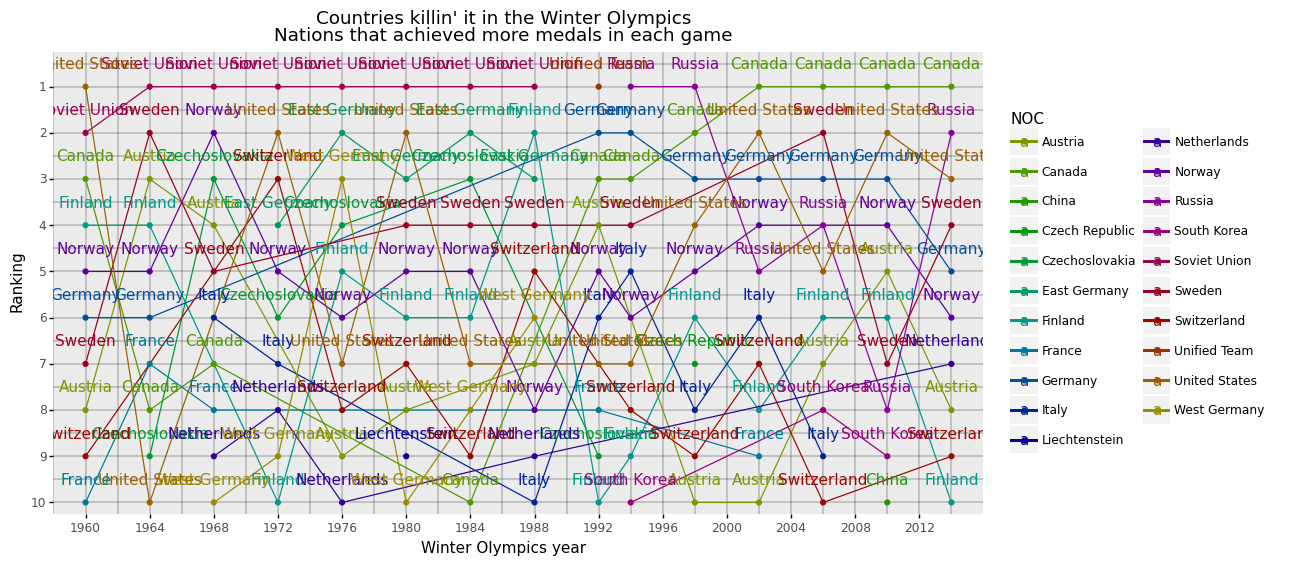

<ggplot: (310332197)>

In [15]:
# first attempt with plotnine
from plotnine import *
(ggplot(df)
    + aes(x='Year', y='rank', color="NOC", label="NOC")
    + geom_line()
    + theme(plot_background=element_rect(),
            panel_grid=element_line(color="black", size=0.25))
    + geom_point()
    + geom_text(nudge_y=0.5)
    + scale_x_continuous(limits=(1960, 2014),
                         breaks=range(1960, 2015, 4),
                         expand=(0,2)
                        )
    + scale_y_reverse(limits=(10, 0.5),
                      breaks=range(10, 0, -1),
                      expand=(0, 0.25))
    + scale_color_hue(colorspace="husl",
                      h=.2,
                      l=.3,
                      s=1
                     )
    + theme(figure_size=(12, 6))
    + labs(
        title = "Countries killin' it in the Winter Olympics\nNations that achieved more medals in each game",
        y = "Ranking",
        x = "Winter Olympics year"
        ))

In [16]:
## eliminate many of labels so our charge is more readable
data_endpoint = (df
.drop(range(10, 11, 1), axis=0)
.drop(range(12, 20, 1), axis=0)
.drop(range(28, 36, 1), axis=0)
.drop(range(39, 40, 1), axis=0)
.drop(range(52, 58, 1), axis=0)
.drop(range(65, 70, 1), axis=0)
.drop(range(78, 79, 1), axis=0)
.drop(range(112, 114, 1), axis=0)
.drop(range(117, 120, 1), axis=0)
.drop(range(123, 125, 1), axis=0)
.drop(range(127, 130, 1), axis=0)
.drop(range(137, 140, 1), axis=0)
.drop([22, 23,25,26, 37, 43, 46, 48, 49, 59, 61, 62,92, 64, 71,75,76, 80, 84, 85, 86, 91, 93, 96,97,98,100, 101, 102,105, 107, 108, 99, 120,126],
       axis=0
      )
 )

In [17]:
data_endpoint

,Year,NOC,Medal,rank
0,1960,France,1.666,10
1,1960,Switzerland,2,9
2,1960,Austria,3.333,8
3,1960,Sweden,7.0,7
4,1960,Germany,7.001,6
...,...,...,...,...
155,2018,Netherlands,14.0,5
156,2018,United States,16.34,4
157,2018,Canada,19.66,3
158,2018,Germany,23.01,2


/Users/pmartisa/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/scales/scale.py:102: PlotnineWarning: scale_color_hue could not recognise parameter `colorspace`
/Users/pmartisa/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 10 rows containing missing values.
/Users/pmartisa/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_label : Removed 10 rows containing missing values.


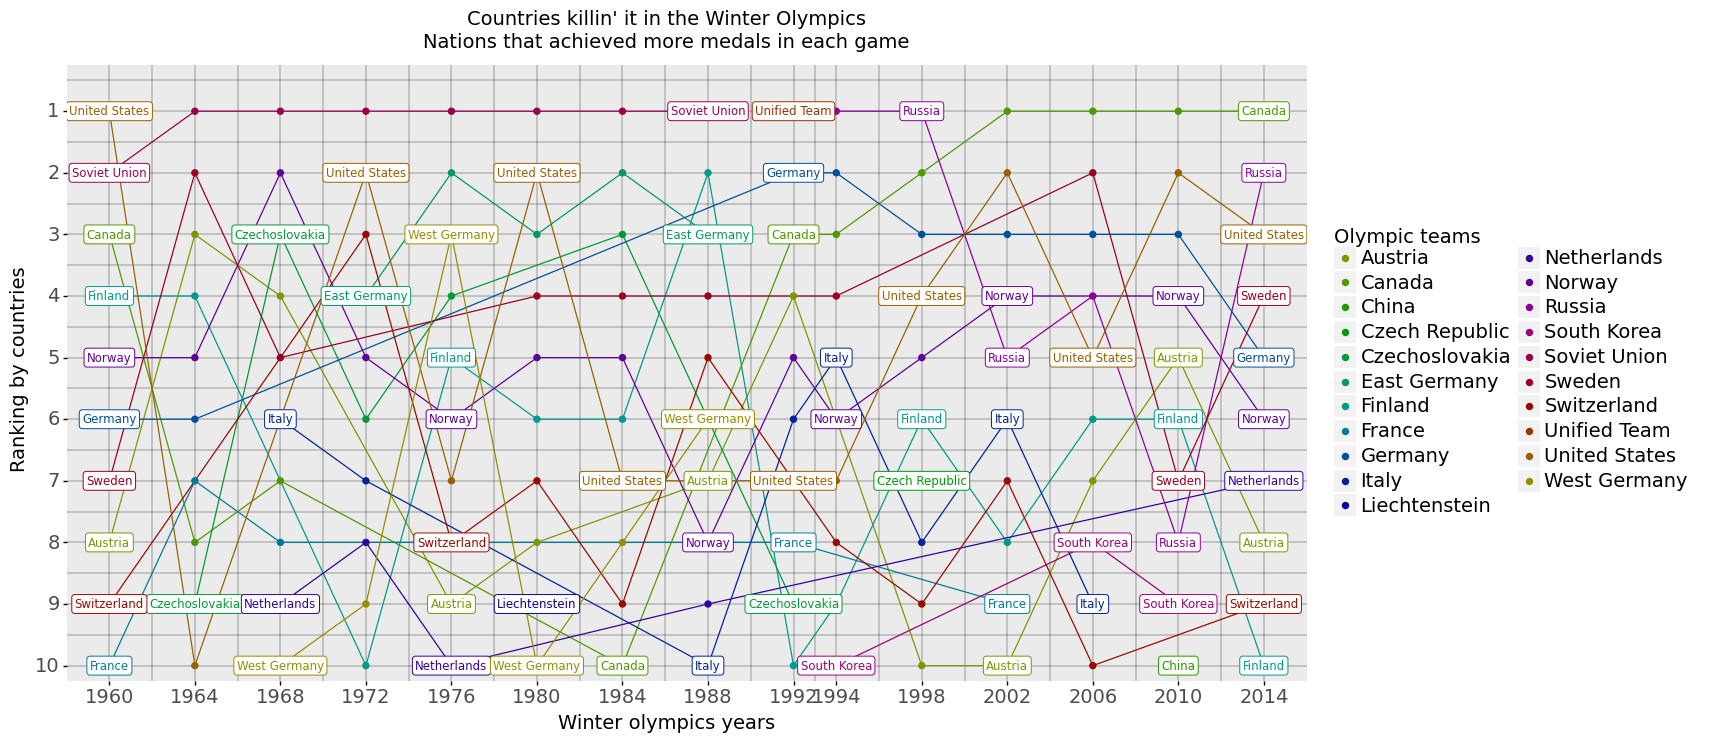

<ggplot: (310606758)>

In [18]:
# second attempt of plotting
from plotnine import *
(ggplot(df)
    + aes(x='Year', y='rank', color="NOC", label="NOC")
    + geom_line(show_legend=False)
    + theme(plot_background=element_rect(),
            panel_grid=element_line(color="black", size=0.25),
            text=element_text(size=14, linespacing=1.3))
    + geom_point(size=2)
    + geom_label(data = data_endpoint,
                 fill="white",
                 size=8.5,
                 show_legend=False)
   
       + scale_x_continuous(limits=(1960, 2014),
                            breaks=(1960, 1964, 1968,1972, 1976, 1980,1984,1988, 1992,1994,1998,2002,2006,2010, 2014),
                            expand=(0,2)
                        )
    + scale_y_reverse(limits=(10, 0.5),
                      breaks=range(10, 0, -1),
                      expand=(0, 0.25))
    + scale_color_hue(colorspace="husl",
                      h=.2,
                      l=.3,
                      s=1
                     )
    + theme(figure_size=(16, 8))
    + labs(
        color = 'Olympic teams',
        title = "Countries killin' it in the Winter Olympics\nNations that achieved more medals in each game",
        y = "Ranking by countries",
        x = "Winter olympics years"
        ))